## Imports

In [12]:
import pandas as pd

## Code

### Dataframe

In [13]:
df = pd.read_csv('./data/dataset_avaliacoes.csv', sep=',')
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


### Methods

- Bag of words (words frequency)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
text = ['Comprei um protudo ótimo', 'Comprei um produto ruim']

vectorize = CountVectorizer()
bag_of_words = vectorize.fit_transform(text)

In [16]:
bag_of_words
dataframe = pd.DataFrame(bag_of_words.toarray(), columns=vectorize.get_feature_names_out())
dataframe

,comprei,produto,protudo,ruim,um,ótimo
0,1,0,1,0,1,1
1,1,1,0,1,1,0


Apply in dataframe

In [17]:
vectorize = CountVectorizer(lowercase=False)
bag_of_words = vectorize.fit_transform(df['avaliacao'])
bag_of_words.shape

(15501, 23352)

limit shape

In [18]:
vectorize = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorize.fit_transform(df['avaliacao'])
bag_of_words.shape

(15501, 50)

In [19]:
dataframe = pd.DataFrame(bag_of_words.toarray(), columns=vectorize.get_feature_names_out())
dataframe.head()

,Não,Produto,ainda,antes,as,até,bem,bom,chegou,com,...,qualidade,que,recebi,recomendo,se,sem,tem,um,uma,veio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['sentimento'],random_state=4978)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
result

0.7982456140350878

It´s possible to get a better accuracy?

In [22]:
from wordcloud import WordCloud

In [35]:
all_words = ' '.join(df['avaliacao'])
word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

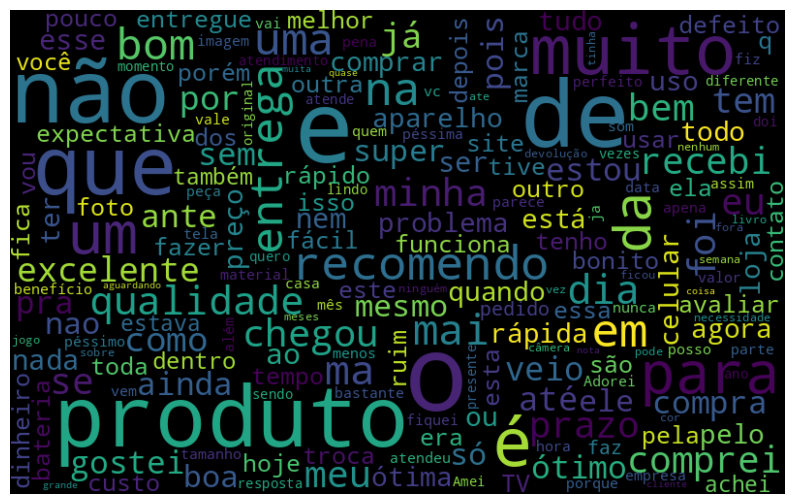

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()